## Estadística Aplicada

Sesión 18 - 16 de octubre

David Eduardo Gómez Marín   1914352     G41

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA


In [37]:
#Tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [38]:
igae_sa = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [39]:
igae_sa

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451
...,...,...
362,2023/03,102.032776
363,2023/04,102.735045
364,2023/05,102.924688
365,2023/06,103.438087


In [40]:
#1 Formato de fecha
igae_sa['meses'] = pd.to_datetime(igae_sa['meses'], format='%Y/%m')

In [41]:
#Hacerlo  index
igae_sa = igae_sa.set_index('meses')

In [42]:
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq=None)

In [43]:
#Asignar funcion mensual
igae_sa = igae_sa.asfreq('MS')

In [44]:
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

###
ARIMA (Series sin efecto estacional)
SARIMA (Series con componente estacional)

Text(0, 0.5, 'índice')

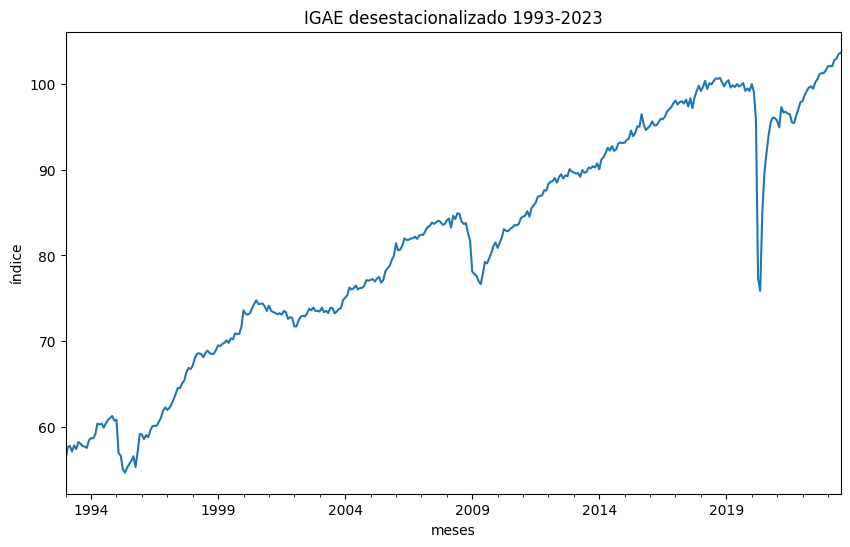

In [45]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('índice')

In [50]:
#Prueba de Dickey-Fuller Aumentada
#Ho: Serie no estacionario
#Ha: Serie estacionaria
df_test = adfuller(igae_sa['IGAE_DESES'])
pvalue = df_test[1]
pvalue

0.7352896929912629

In [52]:
#No rechazamos H0, significa que la serie es no estacionaria
#Hay que hacerla estaionaria aplicando primeras diferencias

igae_sa['igae_diff'] = igae_sa['IGAE_DESES'].diff()

In [53]:
igae_sa

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929
...,...,...
2023-03-01,102.032776,-0.011138
2023-04-01,102.735045,0.702268
2023-05-01,102.924688,0.189644


<Axes: xlabel='meses'>

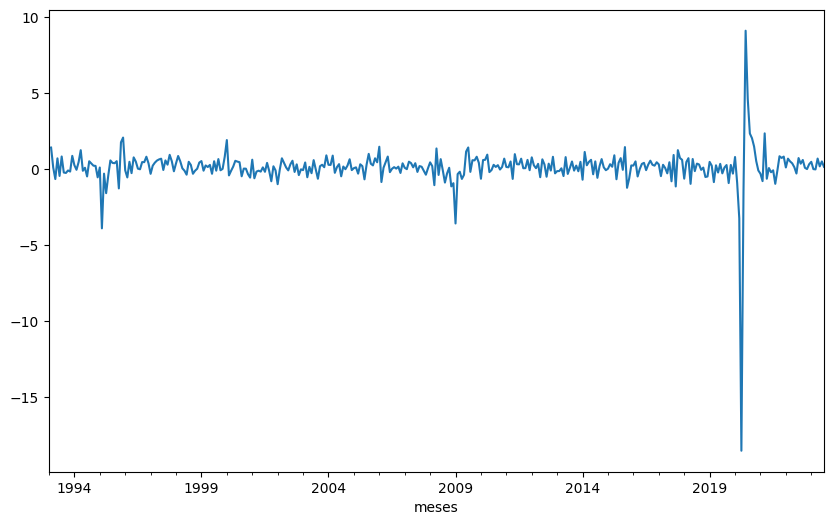

In [55]:
igae_sa['igae_diff'].plot()

In [57]:
#Ya parece estacionaria, pero hay que corroborar con la dickey-fuller test
#Hay que hacer que ignore el primer missing value para que no nos de error
df_test1 = adfuller(igae_sa['igae_diff'].dropna())
pvalue1 = df_test1[1]
pvalue1.round(5)

0.0

In [ ]:
#Ya que el pvalor menor a un alpha de 0.05, se rechaza H0, por lo que si es estacionaria


Rechazamos H0, significa que las primeras diferencias del igae son estacionarias.

IGAE I(1)

Primeras diferencias I(0)

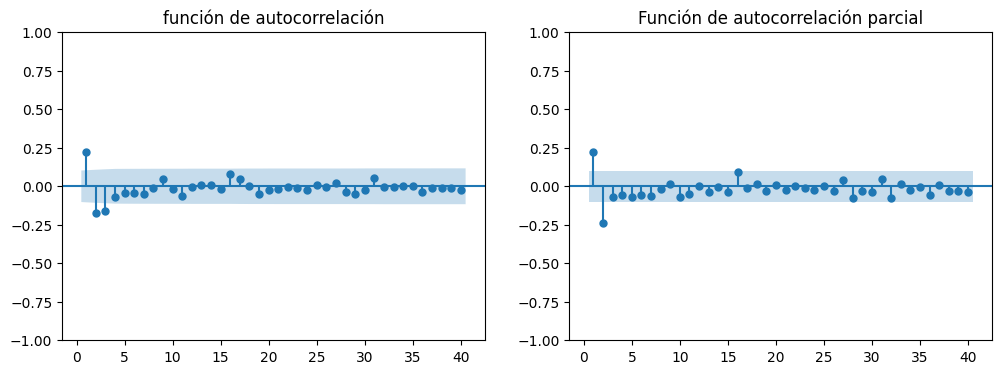

In [64]:
#Graficas de autocorrelación y autocorrelación parcial para verificar que tipo de proceso estocástico estacionario es
#ax son las subgraficas
ig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[0],title='función de autocorrelación')
ax[0].set_ylim(-1,1)


plot_pacf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[1], title='Función de autocorrelación parcial')
ax[1].set_ylim(-1,1)

plt.show()

El area sombreada de la grafica es un intervalo de confianza del 95%, y los puntos dentro de ese intrvalo, estadísticamente son cero.


In [67]:
#Como no sabemos a q gráfica se parece y por lo tant, tampoco sabemos a que modelo se parece, vamos a ejecutar un modelo de prueba

#modelo_prueba = ARIMA (igae_sa['igae_diff'].dropna() ,order=(p,I(d),q) )
#Verificar modelo AR(1)
modelo_prueba = ARIMA (igae_sa['igae_diff'].dropna() ,order=(1,1,0)) 
resultado = modelo_prueba.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -679.632
Date:                Mon, 16 Oct 2023   AIC                           1363.265
Time:                        16:27:15   BIC                           1371.065
Sample:                    02-01-1993   HQIC                          1366.365
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2427      0.008    -32.060      0.000      -0.258      -0.228
sigma2         2.4253      0.032     75.573      0.000       2.362       2.488
Ljung-Box (L1) (Q):                   2.58   Jarque-

Este es el modelo de prueba AR(1)
$$ Y_t = 0.2219 Y_{t-1} + \varepsilon_t $$ 

In [ ]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['igae_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

In [71]:
ic.sort_values('AIC')

AIC          BIC
AR MA                          
3  1   1183.372566  1206.788366
1  4   1184.843160  1212.161593
3  2   1184.880297  1212.198730
4  1   1185.021103  1212.339536
1  5   1186.229362  1217.450429
   2   1186.316694  1205.829861
2  4   1186.638622  1217.859688
3  3   1186.730845  1217.951912
5  1   1186.855985  1218.077052
4  2   1187.146824  1218.367891
1  3   1187.415090  1210.830890
2  2   1187.655051  1211.070851
1  6   1187.912552  1223.036252
6  1   1188.297784  1223.421484
3  6   1188.305905  1231.234872
4  3   1188.608436  1223.732136
2  1   1188.692731  1208.205898
   5   1188.781269  1223.904969
5  2   1189.014715  1224.138415
2  3   1189.183880  1216.502314
0  4   1189.375837  1212.791637
   3   1189.688976  1209.202143
2  6   1189.991402  1229.017735
0  5   1190.171591  1217.490024
5  3   1190.574029  1229.600362
6  2   1190.722022  1229.748356
3  5   1190.724978  1229.751311
2  0   1191.378555  1206.989088
5  4   1191.421166  1234.350133
4  6   1191.704263  1238.535863
3  0   1191.708073  1211.221239
0  6   1191.716873  1222.937940
5  6   1192.105717  1242.839950
6  3   1192.260713  1235.189679
3  4   1192.471324  1227.595024
4  0   1192.619318  1216.035118
5  0   1192.862955  1220.181389
6  4   1193.305266  1240.136866
   0   1193.741006  1224.962073
   6   1194.505973  1249.142839
5  5   1194.566204  1241.397804
4  5   1195.132972  1238.061938
   4   1195.645805  1234.672139
0  2   1198.260034  1213.870567
6  5   1199.988883  1250.723116
1  1   1200.876150  1216.486683
0  1   1200.924033  1212.631933
1  0   1210.529688  1222.237588
0  0   1227.009237  1234.814504

* Primeras diferencias es una ARIMA(3,0,1) = ARMA(3,1)

* igae_deses es una ARIMA(3,1,1)